# Cleaning and Analysing US Census Data

## 1. Inspecting the data

- Importing the necessary libraries:

In [345]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

- The data is stored in 10 different .csv files: states0, states1, states2, etc. Using `glob` to loop thorugh the files, then concatenating all data into one DataFrame:

In [346]:
files = glob.glob("states*.csv")
df_list = []
for filename in files:
    data=pd.read_csv(filename)
    df_list.append(data)
us_census = pd.concat(df_list)

- Inspecting the DataFrame with `.head()`:

In [347]:
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Rhode Island,1053661,13.36%,74.33%,5.68%,0.35%,3.25%,0.04%,"$59,125.27",510388M_543273F
1,1,South Carolina,4777576,5.06%,62.89%,28.75%,0.29%,1.25%,0.05%,"$46,296.81",2322409M_2455167F
2,2,South Dakota,843190,3.24%,82.50%,1.42%,9.42%,1.02%,0.04%,"$51,805.41",423477M_419713F
3,3,Tennessee,6499615,4.72%,73.49%,18.28%,0.23%,1.41%,0.04%,"$47,328.08",3167756M_3331859F
4,4,Texas,26538614,38.05%,44.69%,11.65%,0.26%,3.67%,0.07%,"$55,874.52",13171316M_13367298F


- Inspecting the data types with `.dtypes`:

In [348]:
us_census.dtypes

Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object

## 2. Changing data types where necessary

- Turning the "Income" column into a numeric data type, so it can be used for analysis:

In [349]:
#removing the dollar sign and comma
us_census["Income"] = us_census["Income"].replace('[\$]', '', regex=True)
us_census["Income"] = us_census["Income"].replace('[\,]', '', regex=True)

#converting to numeric data type
us_census["Income"] = pd.to_numeric(us_census["Income"])

- The "GenderPop" column has the number of men and the number of women in one value, e.g. 510388M_543273F. Separating that into two columns: "Men" and "Women", removing the M and F letters and converting into a numeric data type for analysis:

In [350]:
#splitting at the _
genderpop_split = us_census["GenderPop"].str.split("_")

#creating the new columns
us_census["Men"] = genderpop_split.str.get(0)
us_census["Women"] = genderpop_split.str.get(1)

#removing the M and F letters from the values
us_census["Men"]=us_census["Men"].str[:-1]
us_census["Women"]=us_census["Women"].str[:-1]

#converting to numeric data types
us_census["Men"] = pd.to_numeric(us_census["Men"])
us_census["Women"] = pd.to_numeric(us_census["Women"])

- Changing the ethnic group columns into numeric data types:

In [351]:
#function to remove % mark from a ethnic group column and convert the column to a numeric data type:
def ethnicity_to_numeric(column):
    us_census[column]=us_census[column].str[0:-1]
    us_census[column]=round(pd.to_numeric(us_census[column]), 2)
    return us_census[column]

#applying the function to all the ethnic group columns
ethnicity_to_numeric("Hispanic")
ethnicity_to_numeric("White")
ethnicity_to_numeric("Black")
ethnicity_to_numeric("Native")
ethnicity_to_numeric("Asian")
ethnicity_to_numeric("Pacific")

0    0.04
1    0.05
2    0.04
3    0.04
4    0.07
5    0.83
0    0.83
1    0.03
2    0.06
3    0.61
4    0.03
5    0.02
0    0.04
1    0.02
2    0.02
3    0.03
4    0.02
5    0.10
0    0.10
1    0.07
2    0.06
3    0.57
4    0.02
5    0.03
0    0.02
1    0.11
2    0.35
3    0.02
4    0.00
5    0.04
0    0.03
1    0.04
2    0.02
3    0.05
4     NaN
5    0.02
0    0.05
1    8.76
2    0.13
3    0.02
4    0.03
5    0.06
0    0.06
1     NaN
2    0.05
3    0.04
4    0.02
5    0.04
0     NaN
1    0.02
2     NaN
3    0.03
4    0.05
5    0.05
0    0.03
1    1.06
2    0.17
3    0.15
4    0.35
5     NaN
Name: Pacific, dtype: float64

- Checking the data types again to see the changes:

In [352]:
us_census.dtypes

Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic      float64
White         float64
Black         float64
Native        float64
Asian         float64
Pacific       float64
Income        float64
GenderPop      object
Men             int64
Women         float64
dtype: object

## 3. Checking for missing data and duplicates

- Checking for missing values with `.info()`:

In [353]:
us_census.info()
# 5 missing values in the "Pacific" column, 3 missing values in the "Women" column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 5
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  60 non-null     int64  
 1   State       60 non-null     object 
 2   TotalPop    60 non-null     int64  
 3   Hispanic    60 non-null     float64
 4   White       60 non-null     float64
 5   Black       60 non-null     float64
 6   Native      60 non-null     float64
 7   Asian       60 non-null     float64
 8   Pacific     55 non-null     float64
 9   Income      60 non-null     float64
 10  GenderPop   60 non-null     object 
 11  Men         60 non-null     int64  
 12  Women       57 non-null     float64
dtypes: float64(8), int64(3), object(2)
memory usage: 6.6+ KB


- Checking for duplicates with `.duplicated()`

In [354]:
#(excluding the first column with different indexes)
us_census.duplicated(subset=us_census.columns[1:])

0    False
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5     True
0     True
1    False
2    False
3    False
4    False
5     True
0    False
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5     True
0    False
1    False
2    False
3    False
4    False
5     True
0    False
1    False
2    False
3    False
4    False
5     True
dtype: bool

- Dropping the duplicate rows with `.drop_duplicates()`:

In [355]:
us_census = us_census.drop_duplicates(subset=us_census.columns[1:])

- Replacing the null values in the "Women" column with "TotalPop" minus "Men":

In [356]:
us_census=us_census.fillna(value={"Women":us_census["TotalPop"] - us_census["Men"]})

- Replacing the null values in the "Pacific" column with 100% minus the percentages of other ethnic groups:

In [357]:
us_census=us_census.fillna(value={"Pacific": (100 - 
    (us_census["Hispanic"] + us_census["White"] + us_census["Black"] + us_census["Native"] + us_census["Asian"]))})

- Checking for null values again after the changes:

In [358]:
us_census.info()
# no null values left

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 4
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  51 non-null     int64  
 1   State       51 non-null     object 
 2   TotalPop    51 non-null     int64  
 3   Hispanic    51 non-null     float64
 4   White       51 non-null     float64
 5   Black       51 non-null     float64
 6   Native      51 non-null     float64
 7   Asian       51 non-null     float64
 8   Pacific     51 non-null     float64
 9   Income      51 non-null     float64
 10  GenderPop   51 non-null     object 
 11  Men         51 non-null     int64  
 12  Women       51 non-null     float64
dtypes: float64(8), int64(3), object(2)
memory usage: 5.6+ KB


# 4. Analysis and graphs

## 4.1. Total population

- States sorted by total population in descending order:

In [359]:
sorted_by_population = us_census.sort_values(by=["TotalPop"], ascending=False)
sorted_by_population

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
4,4,California,38421464,37.29,40.22,5.68,0.41,13.05,0.35,67264.78,19087135M_19334329F,19087135,19334329.0
4,4,Texas,26538614,38.05,44.69,11.65,0.26,3.67,0.07,55874.52,13171316M_13367298F,13171316,13367298.0
2,2,New York,19673174,17.24,56.47,15.67,0.32,7.90,0.02,64290.75,9541801M_10131373F,9541801,10131373.0
4,4,Florida,19645772,21.34,59.08,15.17,0.21,2.28,0.05,50690.19,9600009M_10045763F,9600009,10045763.0
3,3,Illinois,12873761,15.60,60.86,17.11,0.12,4.48,0.02,59587.05,6316899M_6556862F,6316899,6556862.0
3,3,Pennsylvania,12779559,6.13,77.38,11.63,0.12,2.80,0.02,56170.46,6245344M_6534215F,6245344,6534215.0
0,0,Ohio,11575977,3.67,75.90,16.21,0.17,1.62,0.02,49655.25,5662893M_5913084F,5662893,5913084.0
0,0,Georgia,10006693,8.42,54.29,32.09,0.19,3.10,0.05,50811.08,4883331M_5123362F,4883331,5123362.0
2,2,Michigan,9900571,4.63,72.38,17.63,0.48,2.42,0.02,51201.83,4861973M_5038598F,4861973,5038598.0
3,3,North Carolina,9845333,8.46,64.60,21.40,1.09,2.32,0.05,49937.46,4795408M_5049925F,4795408,5049925.0


- Finding the average population across all states:

In [360]:
average_population = round((us_census["TotalPop"].mean()), 0)
average_population

6265067.0

The state with the biggest population in the US is California with over 38 million people. Vermont has the smallest population of over 626 thousand. The range of populations is very large and Vermont's population is just 1.6% of California's. The average population across all states is around 6.3 million people.

## 4.2. Average yearly income

- States sorted by average income in descending order:

In [361]:
sorted_by_income = us_census.sort_values(by=["Income"], ascending=False)
sorted_by_income

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,0,Maryland,5930538,8.47,52.68,30.68,0.20,5.33,0.04,78765.40,2872643M_F,2872643,3057895.0
5,5,New Jersey,8904413,18.75,56.49,14.39,0.12,8.16,0.03,76581.08,4343027M_4561386F,4343027,4561386.0
1,1,Connecticut,3593222,15.60,67.68,10.35,0.13,4.02,0.02,76146.56,1751607M_1841615F,1751607,1841615.0
3,3,District of Columbia,647484,9.17,33.10,51.78,0.20,3.38,0.03,75466.36,306674M_340810F,306674,340810.0
1,1,Hawaii,1406299,9.19,25.03,2.05,0.14,36.59,8.76,73264.43,709871M_696428F,709871,696428.0
2,2,Virginia,8256630,8.01,63.27,20.18,0.21,5.46,0.06,72866.01,4060948M_4195682F,4060948,4195682.0
1,1,Massachusetts,6705586,11.46,73.04,6.83,0.13,5.84,0.02,72838.94,3249650M_3455936F,3249650,3455936.0
1,1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,70354.74,384160M_349215F,384160,349215.0
4,4,New Hampshire,1324201,3.32,91.32,1.23,0.14,2.19,0.02,68728.86,653484M_670717F,653484,670717.0
4,4,California,38421464,37.29,40.22,5.68,0.41,13.05,0.35,67264.78,19087135M_19334329F,19087135,19334329.0


- Finding the average yearly income across all states:

In [362]:
average_income = round((us_census["Income"].mean()), 2)
average_income

55922.67

Maryland has the highest average yearly income of \\$78765.40, Puerto Rico* has the lowest with \\$20720.54.

*Mississippi and \\$38909.92 if not counting Puerto Rico as a US state.

The average yearly income across all states is \\$55922.67.

Distribution of average income on a histogram:

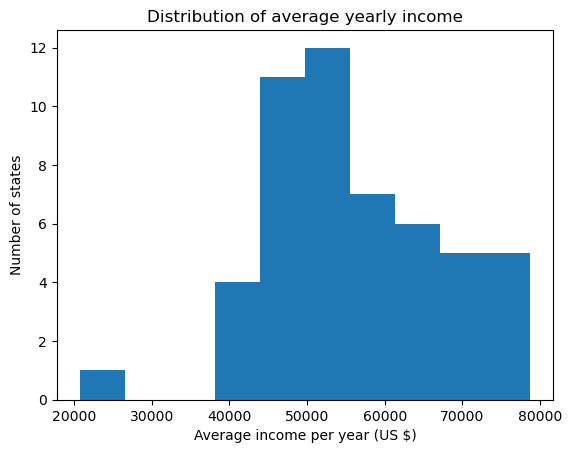

<Figure size 640x480 with 0 Axes>

In [363]:
plt.hist(us_census["Income"])
plt.xlabel("Average income per year (US $)")
plt.ylabel("Number of states")
plt.title("Distribution of average yearly income")
plt.show()
plt.clf()

Average yearly incomes range from about 20 000 - 80 000 US dollars. The lowest average yearly income, Puerto Rico's, is an outlier and the rest of the incomes range from about 38 000 - 79 000 US dollars.

The most (12) states have an average yearly income between around 50 000 - 55 000 US dollars.

## 4.3. Distribution of ethnic groups in states

- Creating 51 pie charts representing the distribution of ethnic groups in each state:

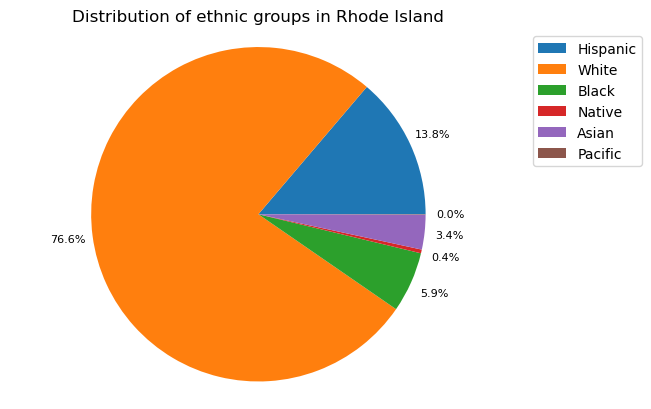

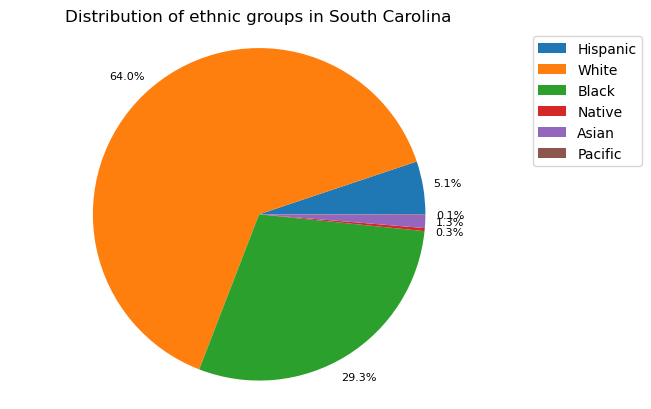

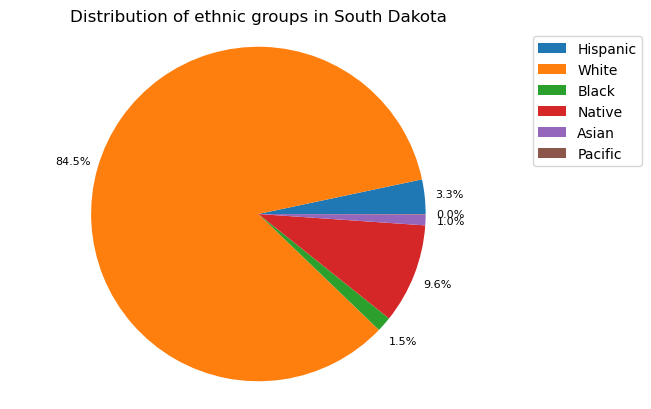

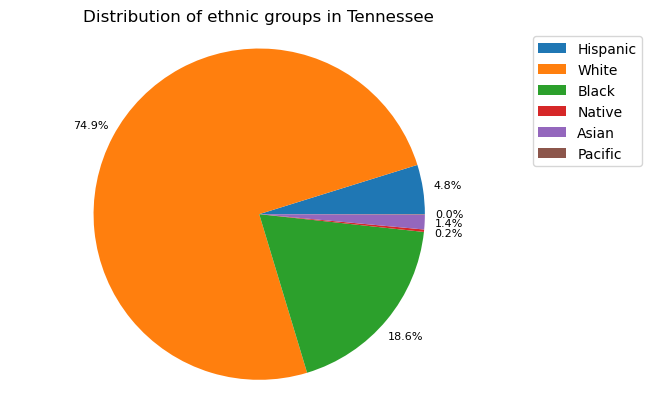

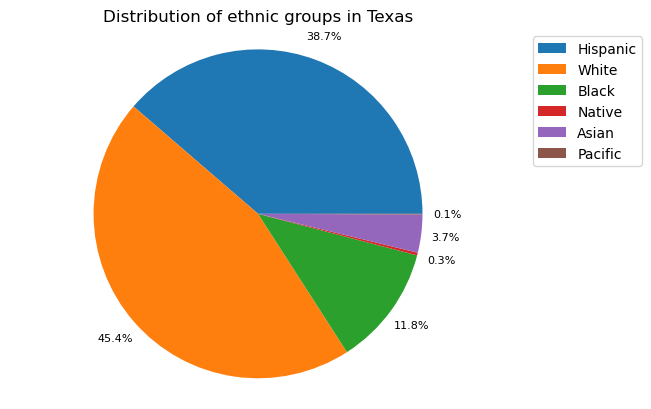

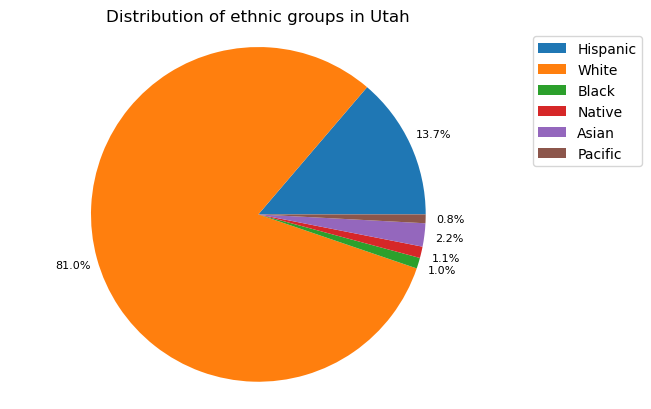

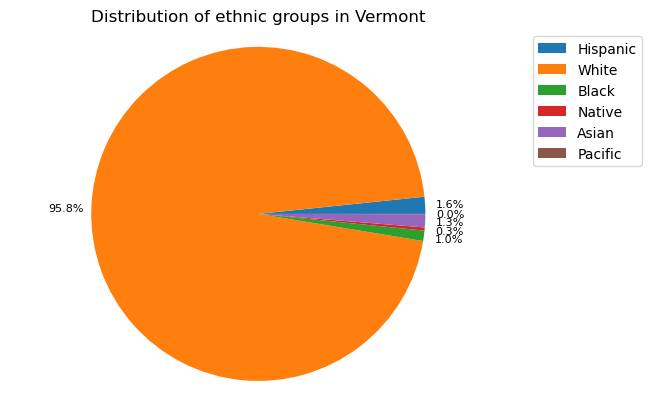

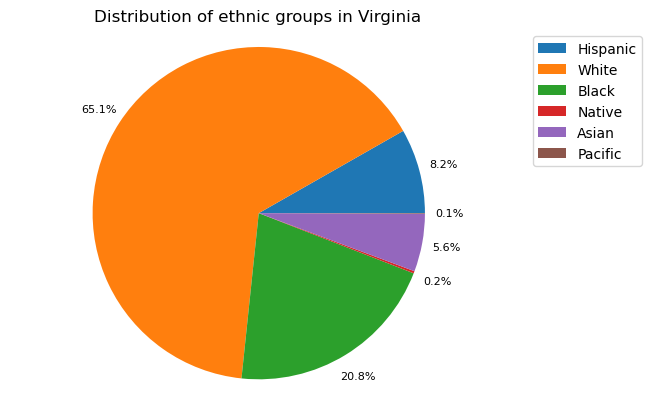

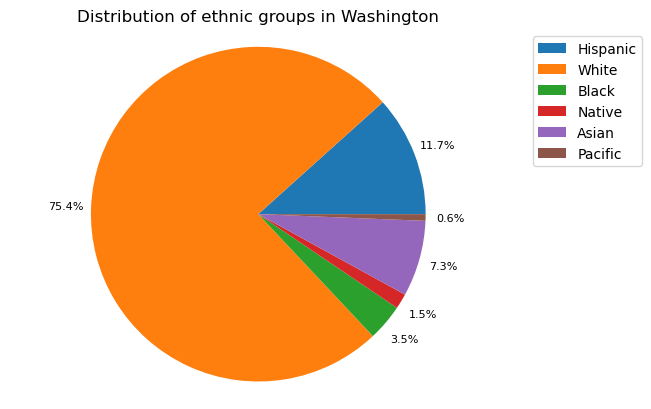

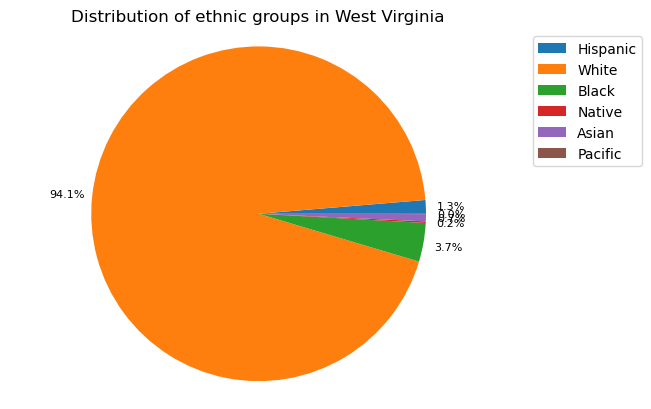

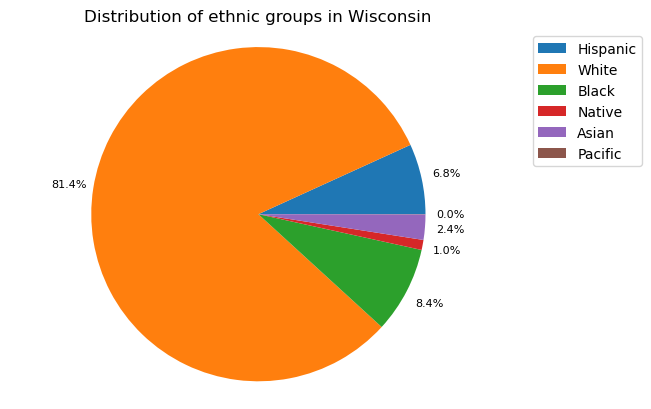

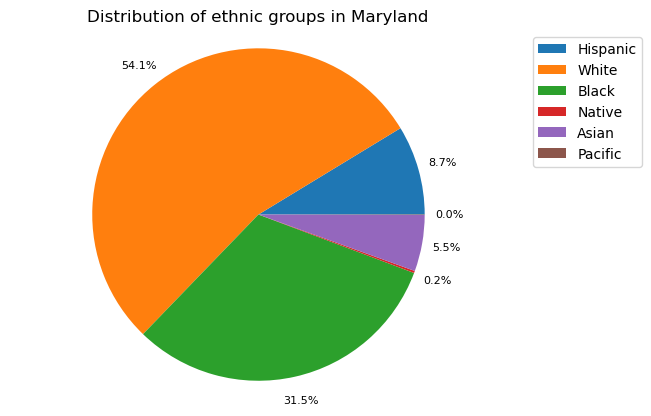

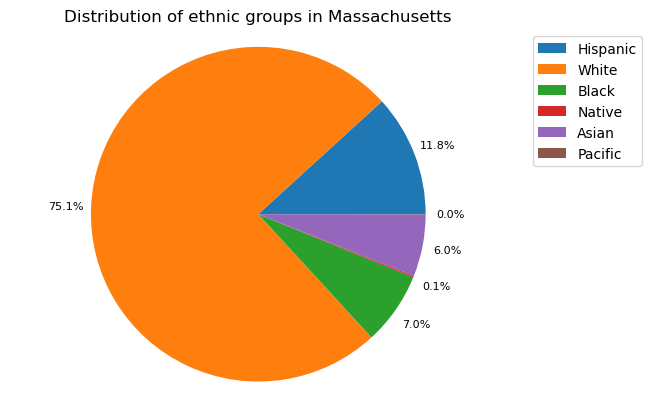

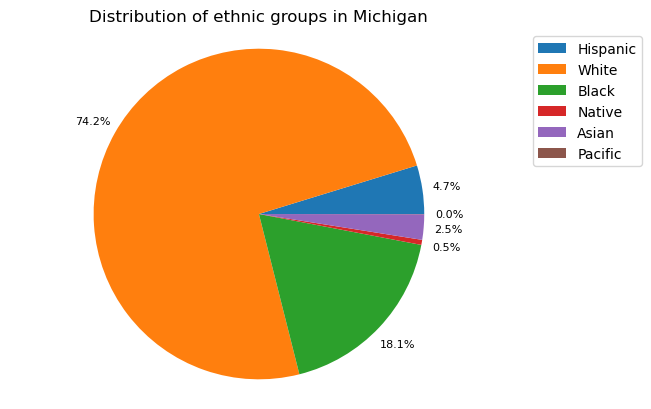

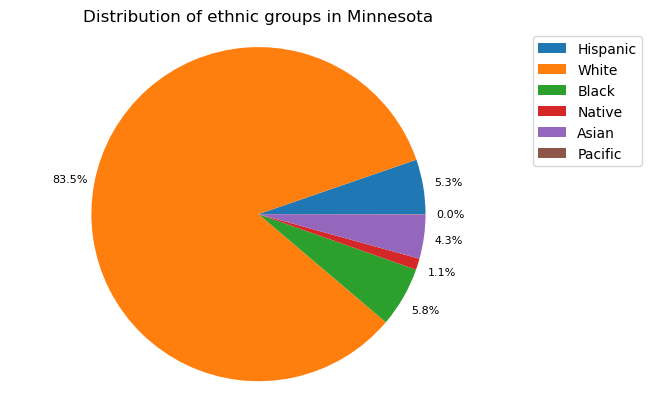

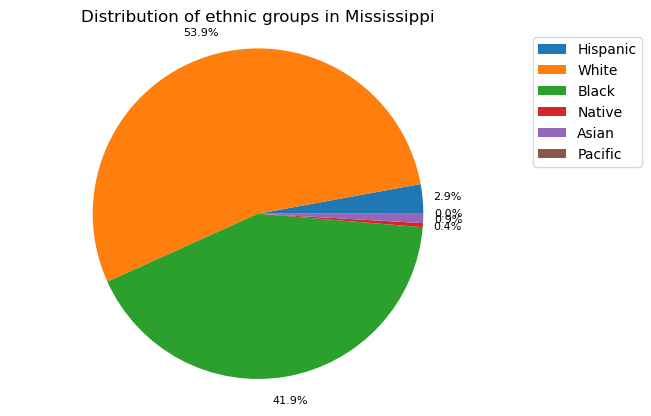

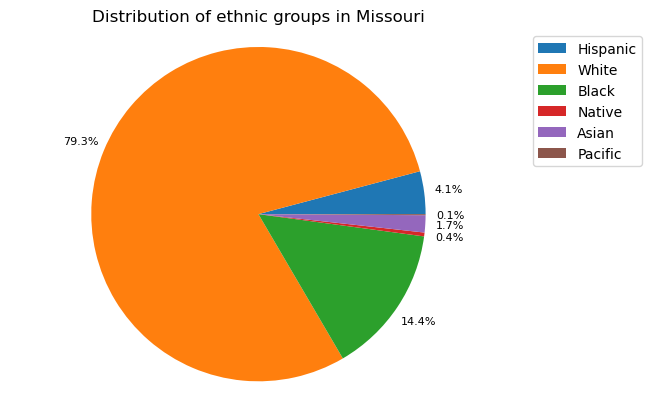

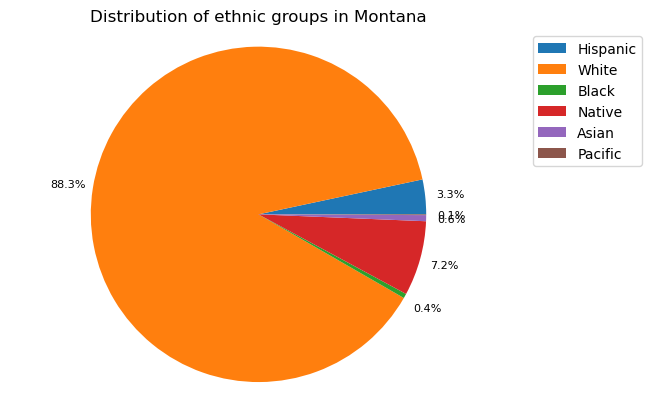

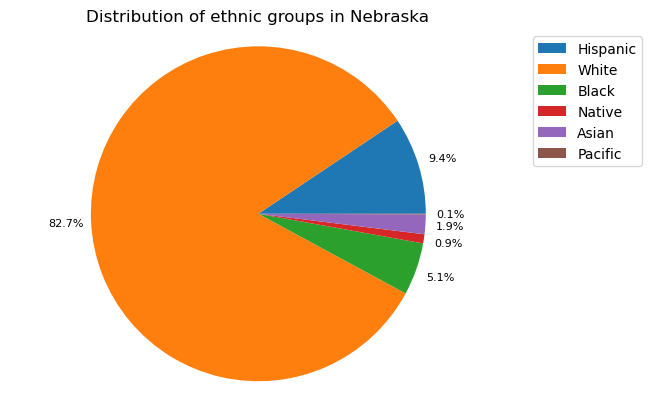

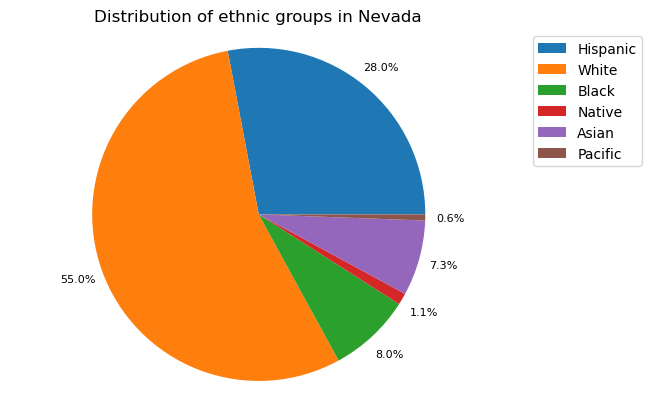

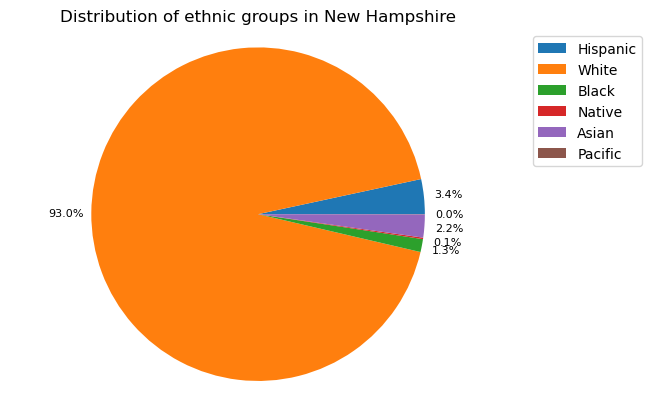

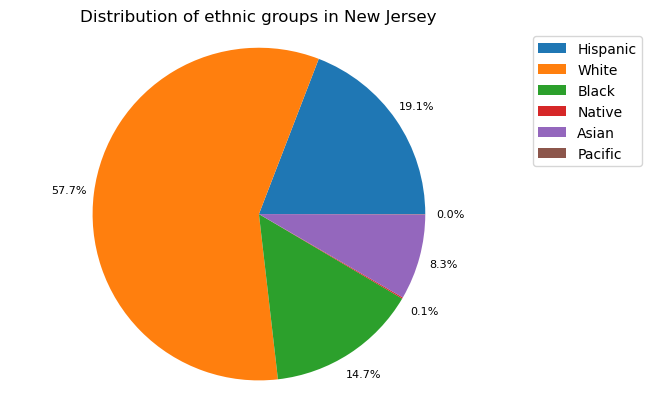

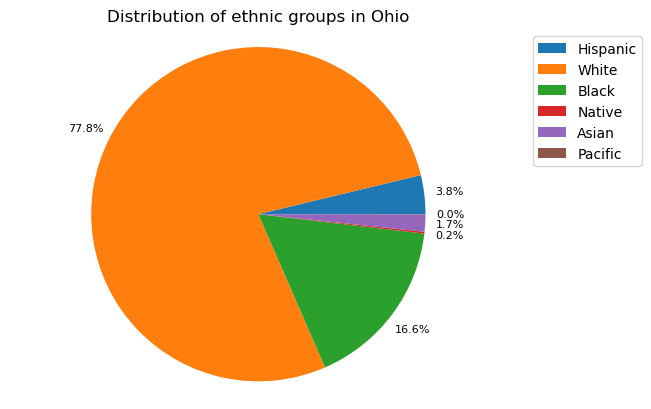

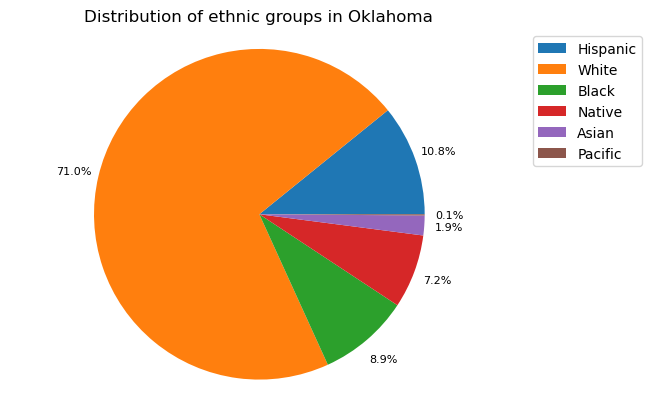

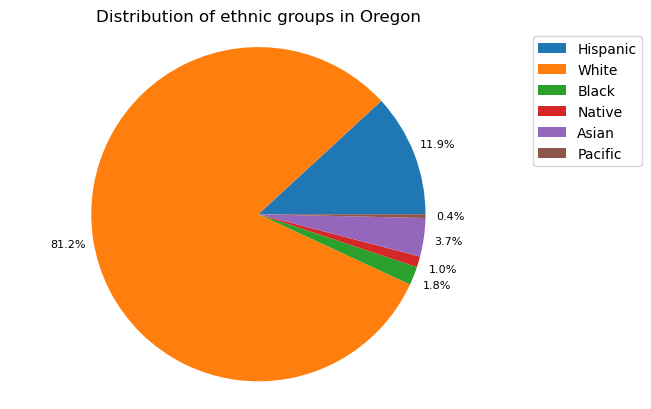

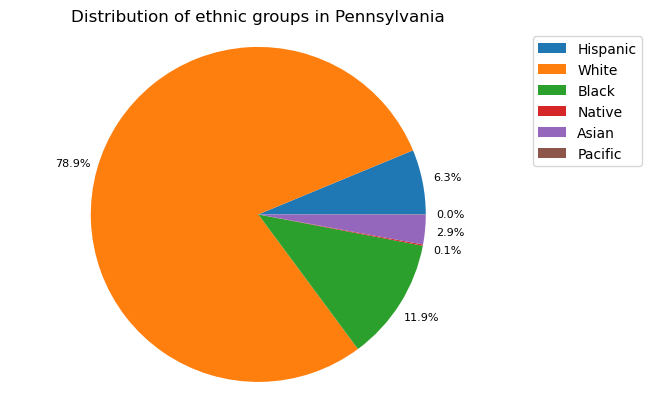

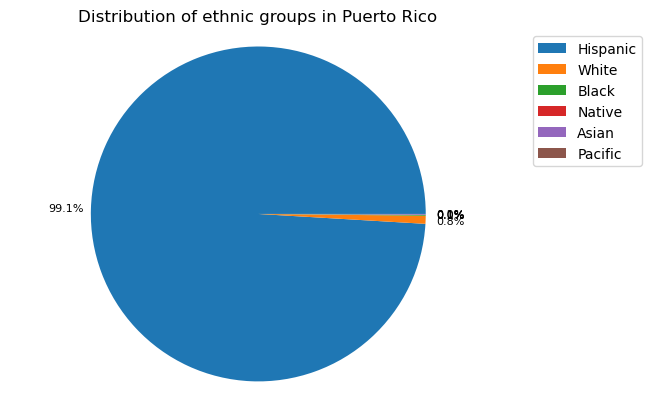

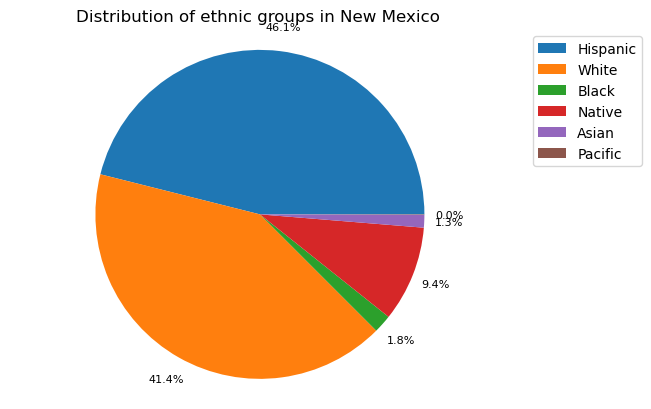

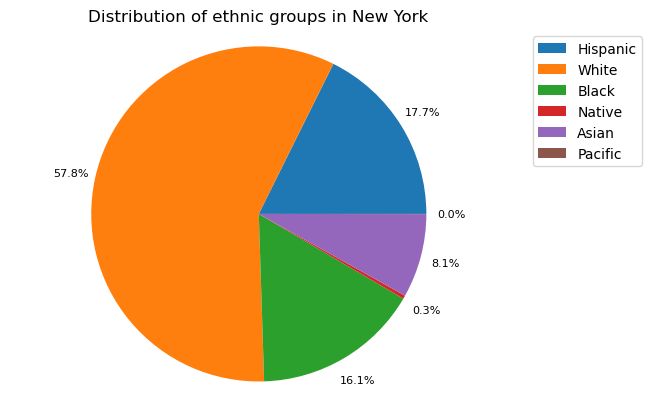

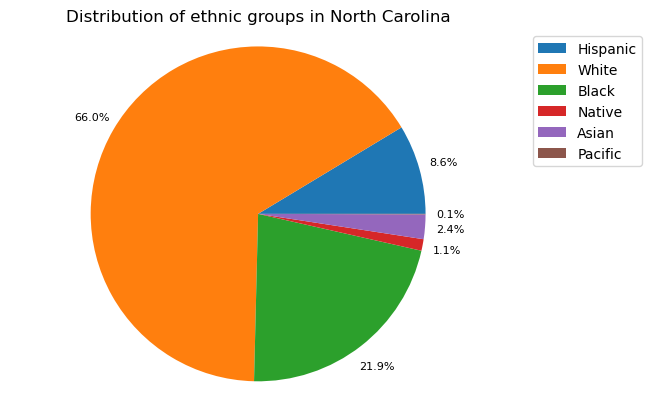

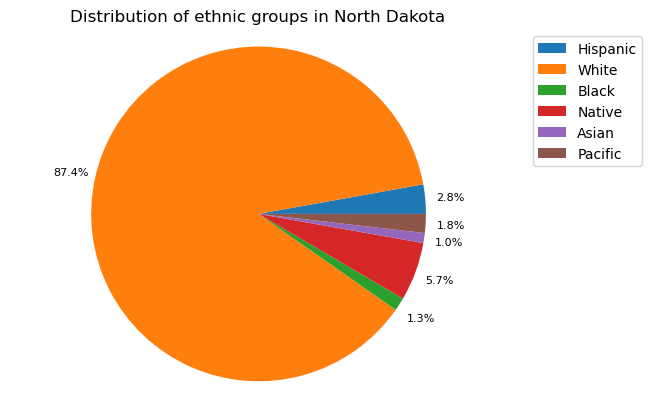

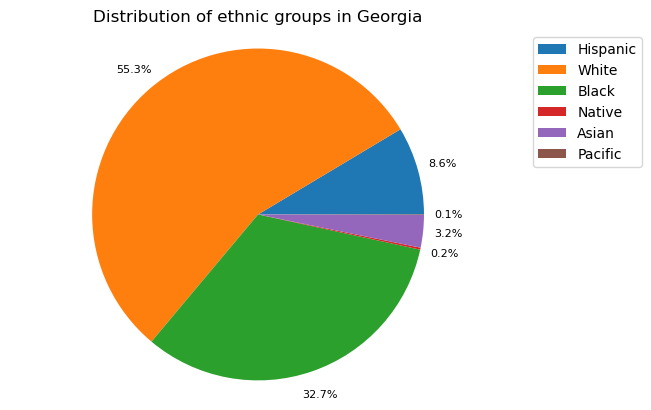

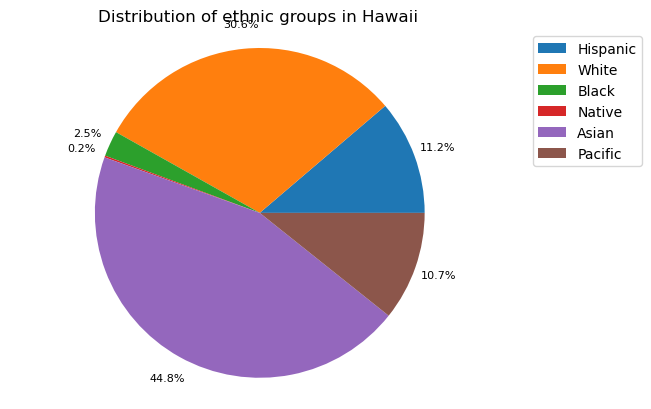

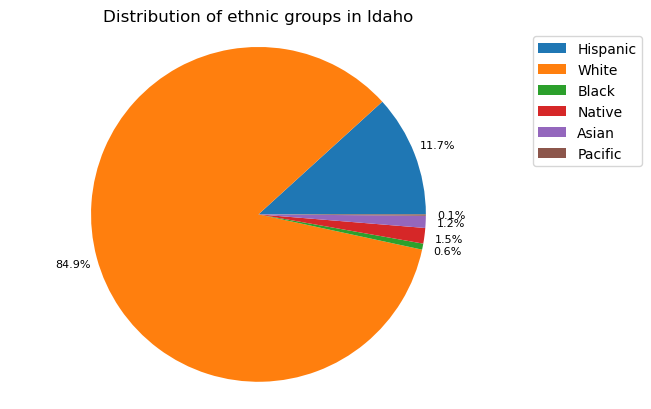

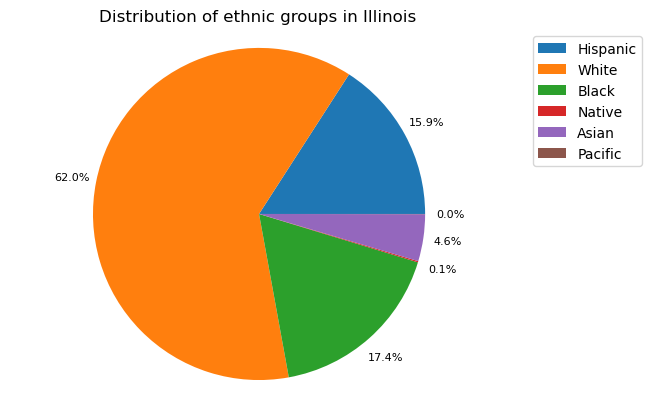

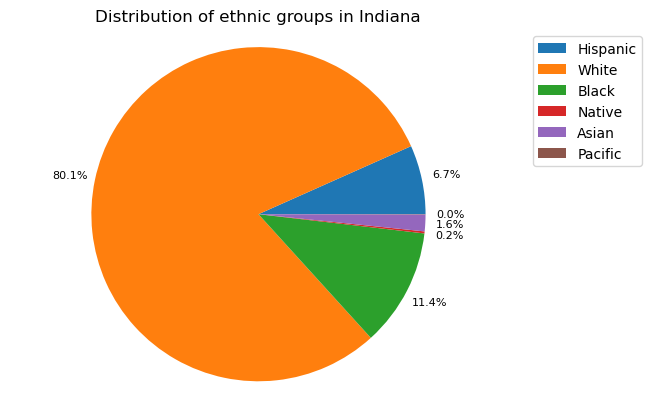

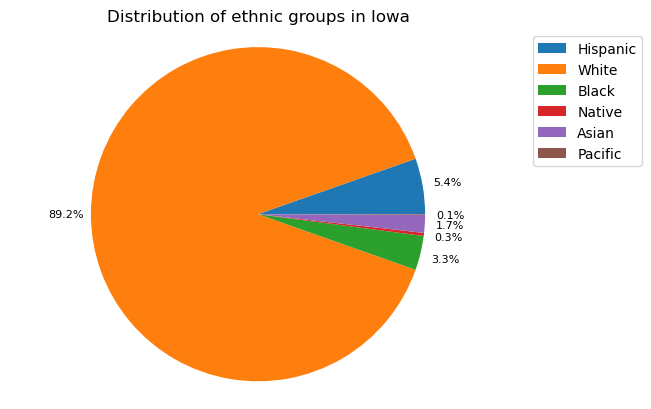

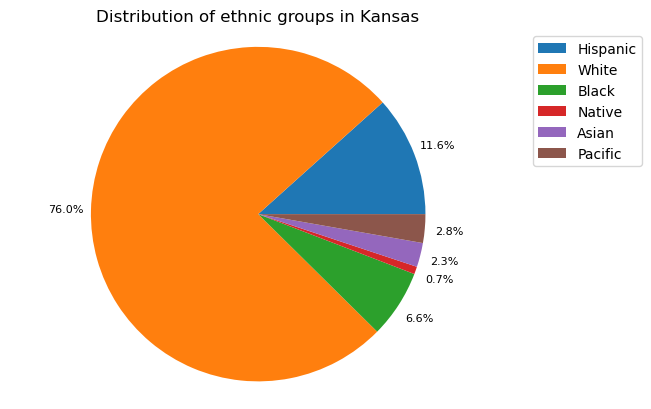

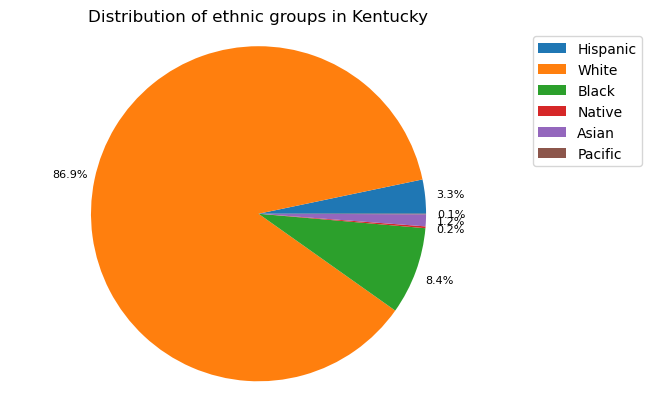

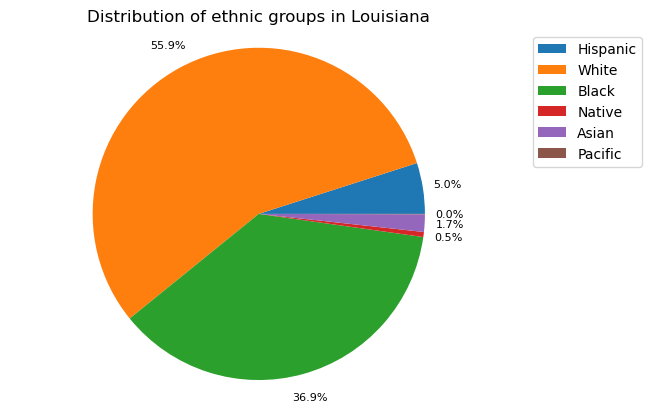

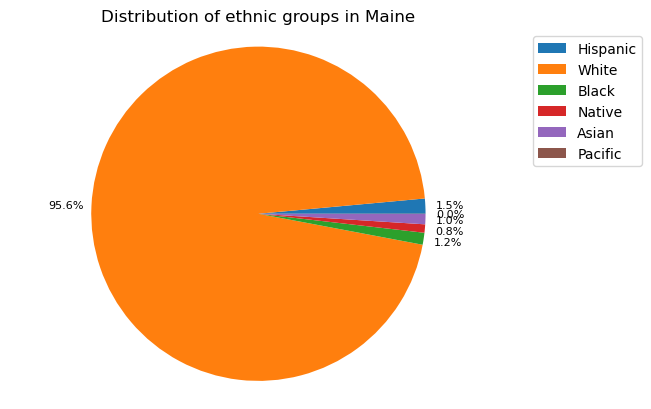

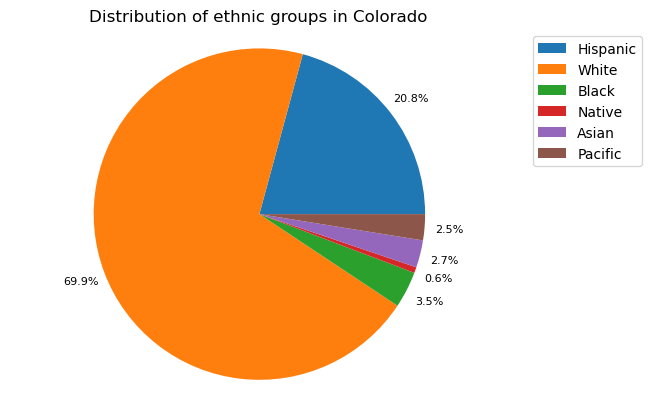

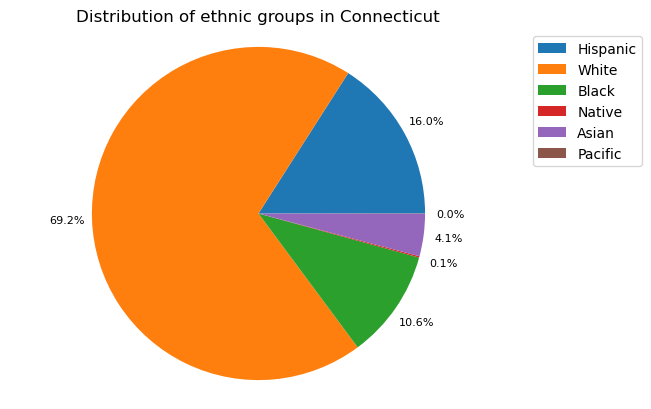

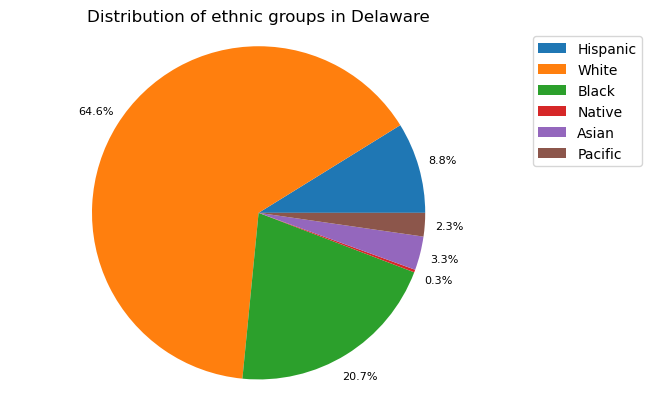

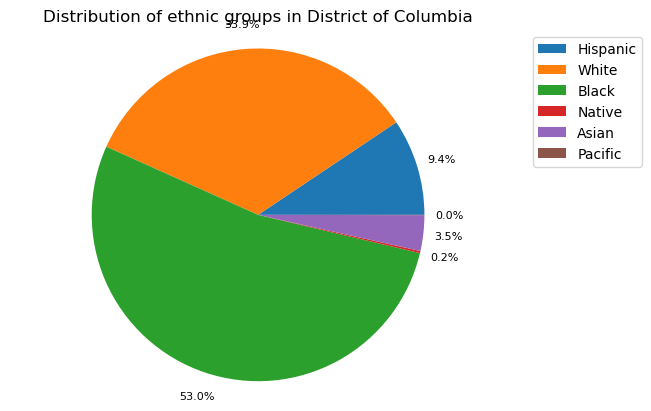

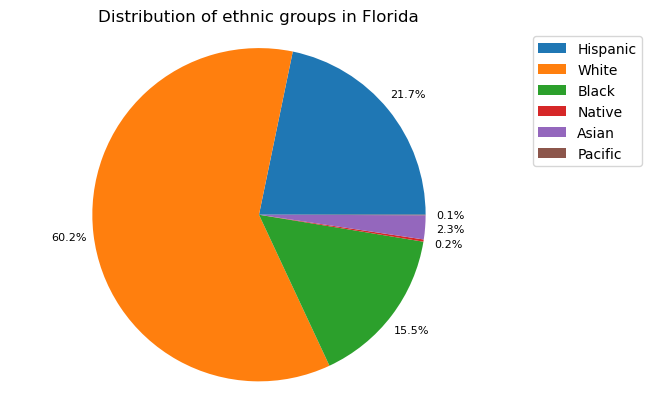

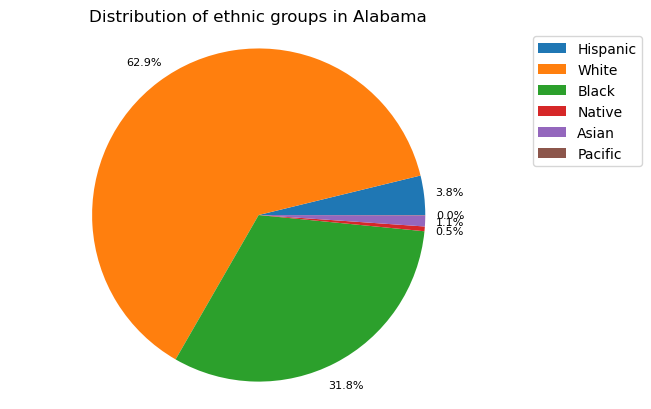

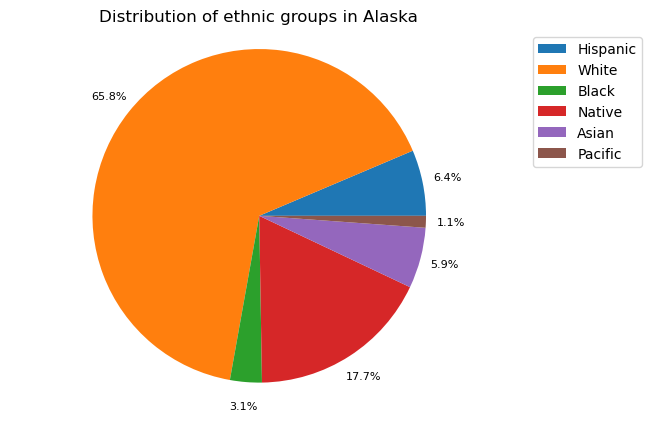

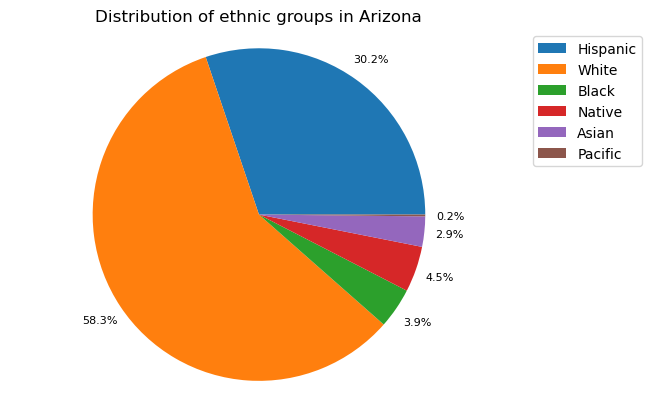

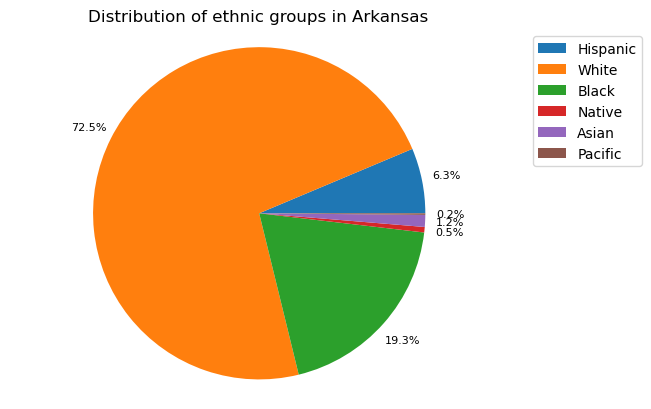

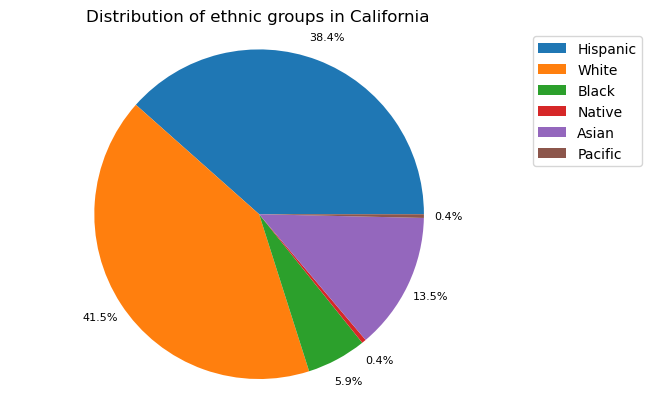

<Figure size 640x480 with 0 Axes>

In [364]:
states = us_census["State"].values
for state in states:
    state_data = us_census[us_census["State"] == state]
    ethnic_groups_in_state = (state_data.iloc[0]["Hispanic"], state_data.iloc[0]["White"], state_data.iloc[0]["Black"], 
                      state_data.iloc[0]["Native"], state_data.iloc[0]["Asian"], state_data.iloc[0]["Pacific"])
    ethnic_groups = ("Hispanic", "White", "Black", "Native", "Asian", "Pacific")
    plt.pie(ethnic_groups_in_state, autopct='%0.1f%%', pctdistance=1.15, textprops={'fontsize': 8})
    plt.legend(ethnic_groups, bbox_to_anchor=(1.04, 1), loc="upper left")
    plt.title("Distribution of ethnic groups in " + state)
    plt.axis("equal")
    plt.show()
    plt.clf()

The largest ethnic group in most states is White, with the exception of Puerto Rico and New Mexico, where the largest ethnic group is Hispanic, Hawaii, where the largest ethnic group is Asian, and District of Columbia, where the largest ethnic group is Black.

## 4.4. Percentage of men and women in states

- Adding "%Men" and "%Women" columns to the DataFrame:

In [365]:
us_census["%Men"] = round(((us_census["Men"] / us_census["TotalPop"]) * 100), 2)
us_census["%Women"] = round(((us_census["Women"] / us_census["TotalPop"]) * 100), 2)

- Sorting states in descending order by percentage of men:

In [366]:
sorted_by_men_percent = us_census.sort_values(by=["%Men"], ascending=False)
sorted_by_men_percent

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women,%Men,%Women
1,1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,70354.74,384160M_349215F,384160,349215.0,52.38,47.62
4,4,North Dakota,721640,2.83,87.45,1.28,5.65,0.96,1.83,58188.11,367963M_353677F,367963,353677.0,50.99,49.01
1,1,Hawaii,1406299,9.19,25.03,2.05,0.14,36.59,8.76,73264.43,709871M_696428F,709871,696428.0,50.48,49.52
3,3,Nevada,2798636,27.10,53.24,7.74,1.09,7.10,0.57,55526.53,1407735M_1390901F,1407735,1390901.0,50.30,49.70
1,1,Montana,1014699,3.27,86.42,0.43,7.06,0.57,0.07,47645.68,510163M_F,510163,504536.0,50.28,49.72
5,5,Utah,2903379,13.47,79.41,1.02,1.08,2.20,0.83,63488.92,1459229M_1444150F,1459229,1444150.0,50.26,49.74
2,2,South Dakota,843190,3.24,82.50,1.42,9.42,1.02,0.04,51805.41,423477M_419713F,423477,419713.0,50.22,49.78
0,0,Colorado,5278906,20.78,69.90,3.55,0.57,2.66,2.54,64657.80,2648667M_2630239F,2648667,2630239.0,50.17,49.83
2,2,Idaho,1616547,11.51,83.14,0.57,1.47,1.14,0.13,48017.32,810464M_806083F,810464,806083.0,50.14,49.86
3,3,Washington,6985464,11.14,72.04,3.38,1.41,7.02,0.61,64493.77,3487725M_3497739F,3487725,3497739.0,49.93,50.07


Alaska has the highest percentage of men (52.38%) and the lowest percentage of women (47.62%).

District of Columbia has the lowest percentage of men (47.36%) and the highest percentage of women (52.64%).